In [68]:
from astropy.io import fits
import numpy as np
from PIL import Image, TiffTags
import os
from PIL.TiffImagePlugin import ImageFileDirectory_v2, ImageFileDirectory_v1
import matplotlib.pyplot as plt

In [2]:
fits_image_filename_0 = "/Users/j35/IPTS/IPTS-SNAP/PID1_15min__0__67.5__188_01481.fits"
assert os.path.exists(fits_image_filename_0)
fits_image_filename_1 = "/Users/j35/IPTS/IPTS-SNAP/PID1_15min__0__67.5__188_01480.fits"
assert os.path.exists(fits_image_filename_1)

### loading fits 

In [3]:
def load_fits(file_name):
    tmp = fits.open(file_name,ignore_missing_end=True)
    return tmp

In [4]:
fits_0 = load_fits(fits_image_filename_0)
fits_0 = fits_0[0]

In [5]:
fits_0.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  512 / length of data axis 1                          
NAXIS2  =                  512 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TOF     =   0.0158886399999999 / Ttime of flight from the external trigger      
TIMEBIN =           1.024E-005 / Time width of this image                       
N_COUNTS=                 9739 / Total counts in this image                     
N_TRIGS =                51490 / Number of triggers acquired                    
TEST1   = 'One_Continuous_Wo

In [6]:
# number of triggered events

In [7]:
metadata_value = fits_0.header['N_TRIGS']
print("N_TRIGS: {}".format(metadata_value))

N_TRIGS: 51490


In [8]:
data = fits_0.data

### work on both files

In [9]:
fits_0 = load_fits(fits_image_filename_0)
fits_0 = fits_0[0]
metadata_value_0 = fits_0.header['N_TRIGS']
data_0 = fits_0.data

In [10]:
fits_1 = load_fits(fits_image_filename_1)
fits_1 = fits_1[0]
metadata_value_1 = fits_1.header['N_TRIGS']
data_1 = fits_1.data

In [11]:
metadata_value_combined = metadata_value_0 + metadata_value_1
print("metadata0: {}".format(metadata_value_0))
print("metadata1: {}".format(metadata_value_1))
print("combined: {}".format(metadata_value_combined))

metadata0: 51490
metadata1: 51490
combined: 102980


### making tiff with metadata added

In [12]:
tiff_image_filename_0_1 = "/Users/j35/IPTS/IPTS-SNAP/PID1_15min__01480_and_01481.tiff"

In [13]:
combined_data = np.add(data_0, data_1, dtype=np.float32)
combined_data.dtype

dtype('float32')

In [29]:
metadata = fits_0.header
raw_metadata = metadata
metadata

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  512 / length of data axis 1                          
NAXIS2  =                  512 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TOF     =   0.0158886399999999 / Ttime of flight from the external trigger      
TIMEBIN =           1.024E-005 / Time width of this image                       
N_COUNTS=                 9739 / Total counts in this image                     
N_TRIGS =                51490 / Number of triggers acquired                    
TEST1   = 'One_Continuous_Wo

In [15]:
new_metadata = {'N_TRIGS': metadata_value_combined}
new_metadata = {'remove_me': 'value of remove_me'}

In [16]:
# metadata['N_TRIGS'] = metadata_value_combined

In [17]:
new_metadata = ImageFileDirectory_v2()

In [50]:
new_metadata['N_TRIGS'] = "{}".format(metadata_value_combined)
new_metadata.tagtype['N_TRIGS'] = TiffTags.FLOAT

In [51]:
new_metadata.tagtype

{'N_TRIGS': 11}

In [56]:
new_image = Image.fromarray(combined_data)
new_image.save(tiff_image_filename_0_1, tiffinfo=new_metadata)

TypeError: '<' not supported between instances of 'str' and 'int'

# try this
https://stackoverflow.com/questions/20529187/what-is-the-best-way-to-save-image-metadata-alongside-a-tif/20529932#20529932

In [79]:
import tifffile
import json

In [80]:
data = combined_data
metadata = dict(N_TAGS=metadata_value_combined)
metadata = json.dumps(metadata)
tifffile.imsave(tiff_image_filename_0_1, data, description=metadata)

### let's see if that worked 

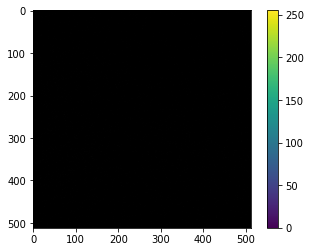

In [74]:
pillow_image = Image.open(tiff_image_filename_0_1)

plt.figure()
plt.imshow(pillow_image)
plt.colorbar()

In [87]:
with tifffile.TiffFile(tiff_image_filename_0_1) as tiff:
    data = tiff.asarray()


In [93]:
tif = tifffile.TiffFile(tiff_image_filename_0_1)
data = tif.asarray()
metadata = tif.pages[0]

In [98]:
metadata.tags['ImageDescription'].value

'{"N_TAGS": 102980}'